# Натянуть сову на линейное пространство

Создайте эмбеддинги слов и визуализируйте векторные операции над ними: сложение, вычитание, взятие ближайшего, дальнейшего и прочее. Сравните качество представлений gensim и BERT с точки зрения операций над словами, докажите примерами.

Для создания эмбеддингов с gensim обучите модель на нормализованных текстовых данных. Данные найдите на kaggle или выберите один из предложенных датасетов. Для создания эмбеддингов с BERT используйте предобученные модели.

Предлагаемые датасеты:
 - [sentiment твитов про ковид](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification)
 - [Amazon product reviews](https://www.kaggle.com/kashnitsky/hierarchical-text-classification)
 - [Отзывы интернет-магазина](https://www.kaggle.com/shymammoth/shopee-reviews)
 - [Тексты статей конференции NIPS](https://www.kaggle.com/rowhitswami/nips-papers-1987-2019-updated?select=papers.csv)

# Projector

Из прошлого задания вы выяснили наиболее хорошую для представления связей между словами модель. Спроецируйте ~2-3 тысячи наиболее популярных слов из выбранного корпуса в tensorflow projector.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/corona_test.csv')
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


<AxesSubplot:>

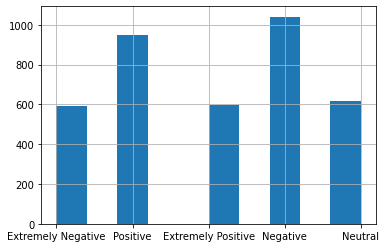

In [2]:
# Какое распределение настроений?
df.Sentiment.hist()

<AxesSubplot:>

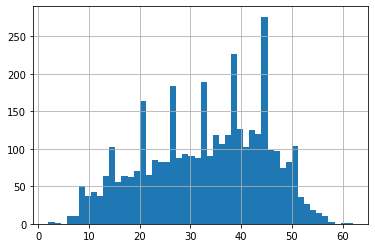

In [3]:
# Сколько слов в твитах
words_n = df.OriginalTweet.apply(lambda text: len(text.split()))
words_n.hist(bins=50)

In [4]:
from itertools import chain
from typing import List
from collections import Counter

def build_vocab(texts: List[str]) -> Counter:
    words = list(chain.from_iterable([text.split() for text in texts]))
    vocab = Counter(words)
    return vocab

texts = df.OriginalTweet.tolist()
vocab = build_vocab(texts)
print(len(vocab))
# слова разного регистра
list(vocab.items())[:30]

23197


[('TRENDING:', 1),
 ('New', 24),
 ('Yorkers', 3),
 ('encounter', 2),
 ('empty', 98),
 ('supermarket', 345),
 ('shelves', 150),
 ('(pictured,', 1),
 ('Wegmans', 2),
 ('in', 1685),
 ('Brooklyn),', 1),
 ('sold-out', 2),
 ('online', 381),
 ('grocers', 6),
 ('(FoodKick,', 1),
 ('MaxDelivery)', 1),
 ('as', 415),
 ('#coronavirus-fearing', 1),
 ('shoppers', 27),
 ('stock', 628),
 ('up', 660),
 ('https://t.co/Gr76pcrLWh', 1),
 ('https://t.co/ivMKMsqdT1', 1),
 ('When', 60),
 ('I', 1070),
 ("couldn't", 12),
 ('find', 54),
 ('hand', 116),
 ('sanitizer', 51),
 ('at', 861)]

In [5]:
# удалим спецсимволы

def preprocess_text(text: str) -> str:
    text = text.lower()
    is_allowed_char = lambda c: c.isalpha() or c == ' '
    text = ''.join(list(filter(is_allowed_char, text)))
    return text

texts = [preprocess_text(text) for text in df.OriginalTweet.tolist()]
vocab = build_vocab(texts)
print(len(vocab))
# уже лучше. Но кажется есть очень частые слова
list(vocab.items())[:30]

14885


[('trending', 4),
 ('new', 98),
 ('yorkers', 3),
 ('encounter', 3),
 ('empty', 130),
 ('supermarket', 498),
 ('shelves', 208),
 ('pictured', 1),
 ('wegmans', 7),
 ('in', 1820),
 ('brooklyn', 6),
 ('soldout', 2),
 ('online', 499),
 ('grocers', 11),
 ('foodkick', 1),
 ('maxdelivery', 1),
 ('as', 484),
 ('coronavirusfearing', 1),
 ('shoppers', 40),
 ('stock', 763),
 ('up', 729),
 ('httpstcogrpcrlwh', 1),
 ('httpstcoivmkmsqdt', 1),
 ('when', 219),
 ('i', 1121),
 ('couldnt', 14),
 ('find', 57),
 ('hand', 140),
 ('sanitizer', 81),
 ('at', 902)]

In [6]:
# это "стоп-слова"
vocab.most_common(30)

[('the', 4236),
 ('to', 3733),
 ('covid', 2602),
 ('and', 2435),
 ('of', 2063),
 ('in', 1820),
 ('a', 1806),
 ('coronavirus', 1357),
 ('for', 1340),
 ('is', 1313),
 ('food', 1296),
 ('i', 1121),
 ('are', 1110),
 ('on', 1056),
 ('you', 1017),
 ('store', 986),
 ('at', 902),
 ('grocery', 813),
 ('this', 808),
 ('stock', 763),
 ('people', 761),
 ('up', 729),
 ('be', 707),
 ('have', 692),
 ('that', 680),
 ('with', 622),
 ('we', 610),
 ('all', 592),
 ('or', 584),
 ('amp', 575)]

In [7]:
# natural language toolkit
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

eng_stopwords = stopwords.words('english')
print(len(eng_stopwords))
eng_stopwords[:30]

179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vlad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

In [8]:
# удалим стоп-слова
eng_stopwords = set(eng_stopwords)

def preprocess_text(text: str) -> str:
    text = text.lower()
    is_allowed_char = lambda c: c.isalpha() or c == ' '
    text = ''.join(list(filter(is_allowed_char, text)))
    
    is_stopword = lambda word: word not in eng_stopwords
    text = ' '.join(list(filter(is_stopword, text.split())))
    return text


texts = [preprocess_text(text) for text in df.OriginalTweet.tolist()]
vocab = build_vocab(texts)
        
print(len(vocab))
# уже лучше. Но есть стоп-слова самого корпуса
vocab.most_common(30)

14743


[('covid', 2602),
 ('coronavirus', 1357),
 ('food', 1296),
 ('store', 986),
 ('grocery', 813),
 ('stock', 763),
 ('people', 761),
 ('amp', 575),
 ('shopping', 508),
 ('online', 499),
 ('supermarket', 498),
 ('panic', 469),
 ('prices', 416),
 ('need', 361),
 ('toilet', 356),
 ('paper', 335),
 ('like', 328),
 ('get', 326),
 ('dont', 288),
 ('buying', 282),
 ('go', 257),
 ('going', 256),
 ('us', 246),
 ('local', 244),
 ('please', 238),
 ('im', 236),
 ('retail', 232),
 ('time', 224),
 ('home', 220),
 ('buy', 210)]

In [9]:
for word, freq in vocab.most_common(10):
    if word in vocab:  # чтобы код не сломался при повторном исполнении
        vocab.pop(word)
        
vocab.most_common(30)

[('supermarket', 498),
 ('panic', 469),
 ('prices', 416),
 ('need', 361),
 ('toilet', 356),
 ('paper', 335),
 ('like', 328),
 ('get', 326),
 ('dont', 288),
 ('buying', 282),
 ('go', 257),
 ('going', 256),
 ('us', 246),
 ('local', 244),
 ('please', 238),
 ('im', 236),
 ('retail', 232),
 ('time', 224),
 ('home', 220),
 ('buy', 210),
 ('shelves', 208),
 ('stores', 200),
 ('coronaviruspandemic', 196),
 ('work', 195),
 ('due', 193),
 ('everyone', 187),
 ('help', 185),
 ('consumer', 183),
 ('today', 179),
 ('demand', 162)]

##### Стемминг

Это процесс нахождения основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова

In [10]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [11]:
from tqdm import tqdm

def preprocess_text(text: str) -> str:
    text = text.lower()
    is_allowed_char = lambda c: c.isalpha() or c == ' '
    text = ''.join(list(filter(is_allowed_char, text)))
    
    is_stopword = lambda word: word not in eng_stopwords
    text = ' '.join(list(filter(is_stopword, text.split())))
    
    text = ' '.join(list(map(stemmer.stem, text.split())))
    return text


texts = []
for text in tqdm(df.OriginalTweet.tolist()):
    texts.append(preprocess_text(text))
vocab = build_vocab(texts)
        
print(len(vocab))
vocab.most_common(30)

100%|████████████████████████████████████████████████████████████████████████████| 3798/3798 [00:01<00:00, 3302.48it/s]

12072


[('covid', 2602),
 ('coronaviru', 1360),
 ('food', 1324),
 ('store', 1187),
 ('groceri', 880),
 ('stock', 875),
 ('peopl', 781),
 ('shop', 647),
 ('supermarket', 576),
 ('amp', 576),
 ('go', 513),
 ('onlin', 499),
 ('buy', 499),
 ('price', 476),
 ('panic', 469),
 ('need', 444),
 ('get', 426),
 ('toilet', 357),
 ('like', 354),
 ('paper', 345),
 ('work', 307),
 ('time', 292),
 ('dont', 289),
 ('retail', 281),
 ('local', 252),
 ('us', 246),
 ('pleas', 239),
 ('im', 236),
 ('home', 232),
 ('suppli', 231)]

In [12]:
# Используем энкодер из sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore').fit([[w] for w in vocab])

In [13]:
import numpy as np

def encode_vocab(v: str) -> np.ndarray:
    words = [[w] for w in v.split()]
    vecs = encoder.transform(words)
    return vecs.sum(axis=0)

encoded_vocab = []
for v in tqdm(vocab, total=len(vocab)):
    encoded_vocab.append(encode_vocab(v)) 

encoded_vocab = np.stack(encoded_vocab)
encoded_vocab.shape

100%|████████████████████████████████████████████████████████████████████████████| 12072/12072 [02:00<00:00, 99.82it/s]


(12072, 12072)

C:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


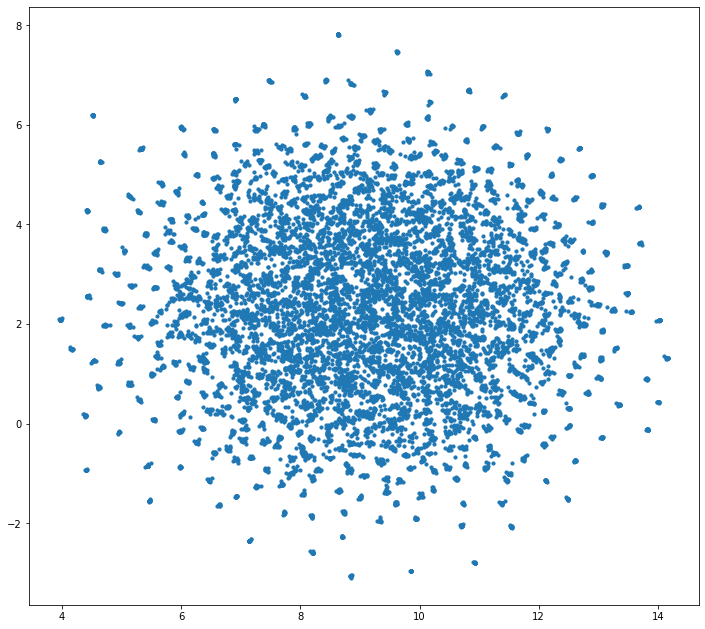

In [14]:
import umap.umap_ as umap
# Спроецируем в 2d пространство

points = umap.UMAP(random_state=42).fit_transform(encoded_vocab)

plt.figure(figsize=(12, 11))
plt.scatter(x=points[:, 0], y=points[:, 1], s=10)

# Gensim

In [15]:
from gensim.models import Word2Vec

comms = vocab

sentences = [comm.split() for comm in comms]
model = Word2Vec(sentences=sentences,
                 sg=False,  # cbow model
                 vector_size=100,
                 window=5,
                 seed=42,
                 epochs=15, 
                 min_count=1
                 )
print('размерность векторов слов в модели:', model.wv.vectors.shape)

размерность векторов слов в модели: (12072, 100)


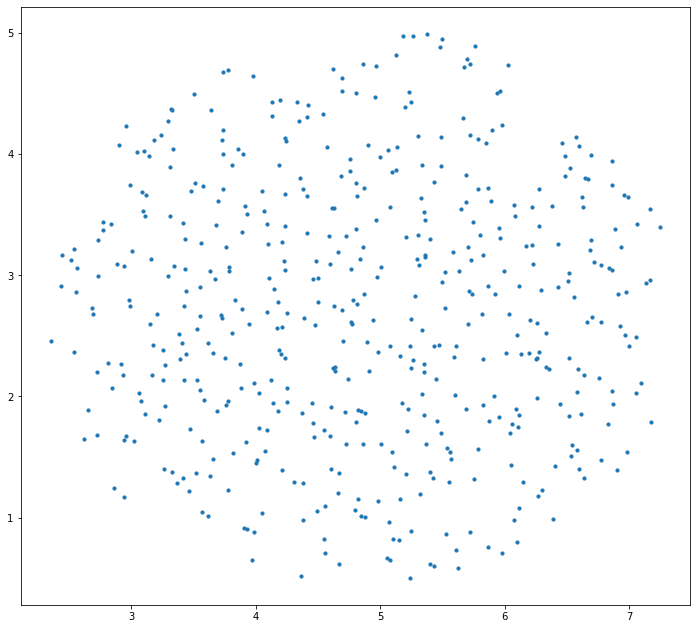

In [16]:
# Спроецируем в 2d пространство

points = umap.UMAP(random_state=42).fit_transform(model.wv.vectors[:500])

plt.figure(figsize=(12, 11))
plt.scatter(x=points[:, 0], y=points[:, 1], s=10)

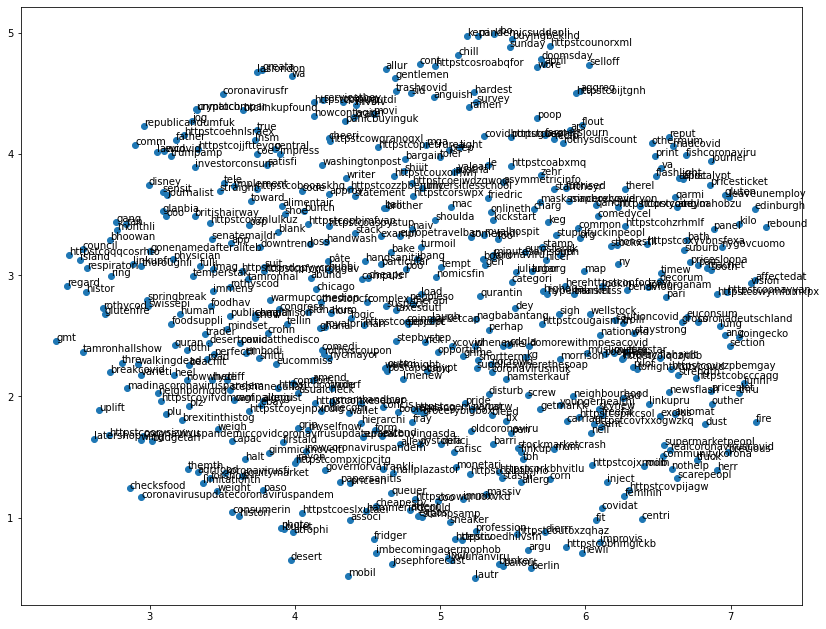

In [17]:
# Рассмотрим отдельные слова 

fig, ax = plt.subplots(figsize=(14, 11))
ax.scatter(points[:, 0], points[:, 1])

for i, txt in enumerate(model.wv.index_to_key[:500]):
    ax.annotate(txt, (points[i, 0], points[i, 1]))

In [18]:
model.wv.most_similar('covid')

[('love', 0.36347830295562744),
 ('economyspend', 0.3437322974205017),
 ('everyonewest', 0.3401036858558655),
 ('kpop', 0.33394044637680054),
 ('stocknot', 0.33360975980758667),
 ('guinnessu', 0.3329016864299774),
 ('newssydney', 0.33284005522727966),
 ('wildli', 0.32980066537857056),
 ('republicandumfuk', 0.32520154118537903),
 ('nba', 0.32000547647476196)]

In [19]:
import sys
model.wv.most_similar('covid', topn=sys.maxsize)[-10:]

[('camp', -0.3074420988559723),
 ('realdonaldtrumpchang', -0.3074437379837036),
 ('liber', -0.311006635427475),
 ('persecut', -0.3192498981952667),
 ('httpstcofqzjdlij', -0.32181382179260254),
 ('chew', -0.32434403896331787),
 ('outtranscrowdfundcashvenmo', -0.32510602474212646),
 ('thinkcoronaviruspandem', -0.336725652217865),
 ('toughen', -0.34406545758247375),
 ('panden', -0.3447002172470093)]

In [20]:
model.wv.most_similar(positive=['world', 'virus'], negative=['covid'])

[('healthhttpstcojrvxribl', 0.3525276184082031),
 ('black', 0.3479071855545044),
 ('xcovid', 0.34125903248786926),
 ('damn', 0.3403085172176361),
 ('biotech', 0.340133398771286),
 ('pivot', 0.3301449120044708),
 ('cash', 0.3264455795288086),
 ('tata', 0.32466599345207214),
 ('httpstcokbbdihjnv', 0.3194156289100647),
 ('timetun', 0.3174259662628174)]

In [21]:
keys = ['covid', 'world', 'virus']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [22]:
from sklearn.manifold import TSNE

tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

C:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


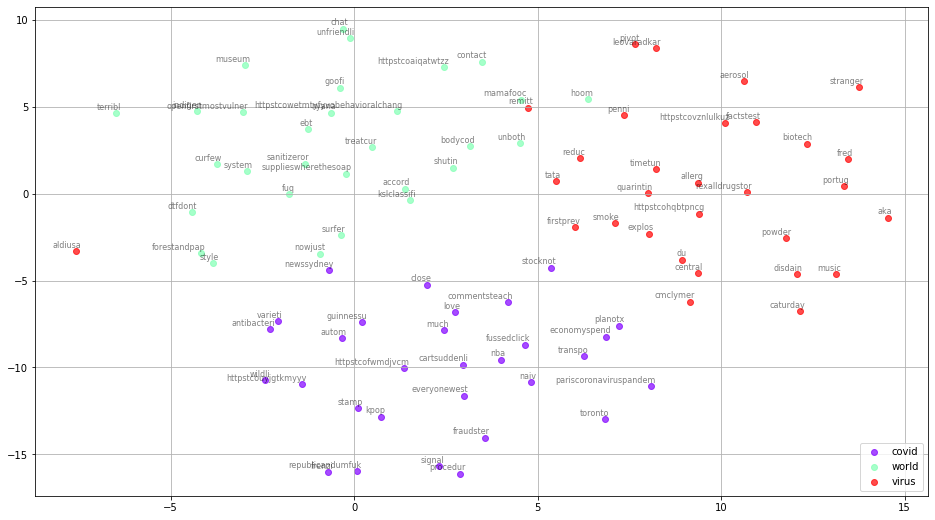

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

# BERT

In [24]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [25]:
query = "I don't want go on exam"

print(query)
print(tokenizer.tokenize(query))

I don't want go on exam
['i', 'don', "'", 't', 'want', 'go', 'on', 'exam']


In [26]:
# Какие токены есть в словаре берта?
len(list(tokenizer.vocab.keys()))

30522

In [27]:
# Получим индексы токенов
tokenized_query = tokenizer.tokenize(query)

indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_query)
indexed_tokens

[1045, 2123, 1005, 1056, 2215, 2175, 2006, 11360]

In [28]:
# модели нужны метки о принадлежности токена предложениям. Сейчас предложение одно

segments_ids = [1] * len(indexed_tokens)
segments_ids

[1, 1, 1, 1, 1, 1, 1, 1]

In [29]:
# convert to torch

tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [30]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # возращать эмбеддинги каждого слова
                                  )
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [31]:
outputs = model(tokens_tensor, segments_tensors)

embeddings = outputs[2]

words = tokenizer.vocab.keys()
word_embedding = model.embeddings.word_embeddings.weight

In [32]:
print ("Слоёв:", len(embeddings), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Размер батча:", len(embeddings[layer_i]))
batch_i = 0

print ("Токенов:", len(embeddings[layer_i][batch_i]))
token_i = 0

print ("Размер эмбеддинга:", len(embeddings[layer_i][batch_i][token_i]))

Слоёв: 13   (initial embeddings + 12 BERT layers)
Размер батча: 1
Токенов: 8
Размер эмбеддинга: 768


In [33]:
# incapsulate to function

def make_sentence_embedding(text: str) -> torch.Tensor:
    # Получим индексы токенов
    tokenized_query = tokenizer.tokenize(text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_query)
    segments_ids = [1] * len(indexed_tokens)
    
    # to tensor 
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    
    # calc embeddings
    outputs = model(tokens_tensor, segments_tensors)
    last_layer_embs = embeddings[-1]
    sentense_embedding = last_layer_embs.squeeze(0).sum(dim=0)
    
    return sentense_embedding

In [34]:
query_emb = make_sentence_embedding(query)
query_emb.size()

torch.Size([768])

In [35]:
texts_embs = []

for text in tqdm(texts):
    emb = make_sentence_embedding(text)
    texts_embs.append(emb)

100%|██████████████████████████████████████████████████████████████████████████████| 3798/3798 [05:30<00:00, 11.50it/s]


In [36]:
len(texts_embs)

3798

In [37]:
texts_embs = torch.stack(texts_embs)

texts_embs.size()

torch.Size([3798, 768])

(array([   0.,    0.,    0.,    0.,    0., 3798.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

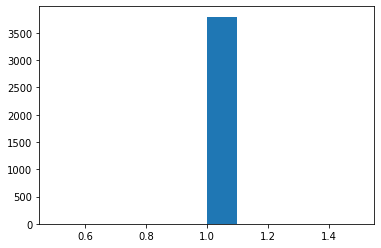

In [38]:
similarities = torch.nn.functional.cosine_similarity(query_emb, texts_embs)


plt.hist(similarities.detach().numpy())

In [39]:
from tensorboardX import SummaryWriter

writer = SummaryWriter()

writer.add_embedding(word_embedding,
                         metadata  = words,
                        tag = f'word embedding')
writer.close()

In [40]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [43]:
%tensorboard --logdir="C:\Users\Vlad\opencv\Scripts\DataAn\Lab7\runs" --host=127.0.0.1